In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [72]:
shopping_transaction = pd.read_csv('shopping_transaction.csv')
st = shopping_transaction
st.head()

,고객ID,성별,나이,월구매금액,방문빈도,회원등급,구매채널
0,1001,여성,21,308513,9,Silver,온라인
1,1002,여성,54,108331,5,Bronze,오프라인
2,1003,여성,33,106956,22,Bronze,모바일
3,1004,여성,54,404472,13,Silver,오프라인
4,1005,여성,30,322842,9,Silver,오프라인


In [61]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

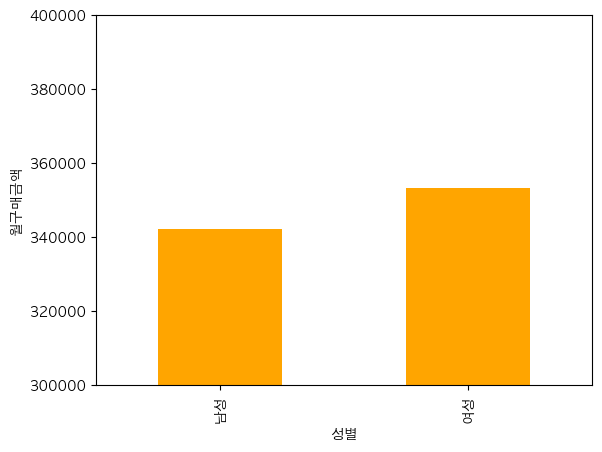

In [148]:
# 1. 성별에 따른 월평균 구매금액의 차이를 시각적으로 비교하여 분석하시오.

gender_mean = st.groupby('성별')['월구매금액'].mean()
gender_mean.plot(kind = 'bar', color = 'orange')
plt.ylim(300000, 400000)
plt.ylabel('월구매금액')
plt.show()

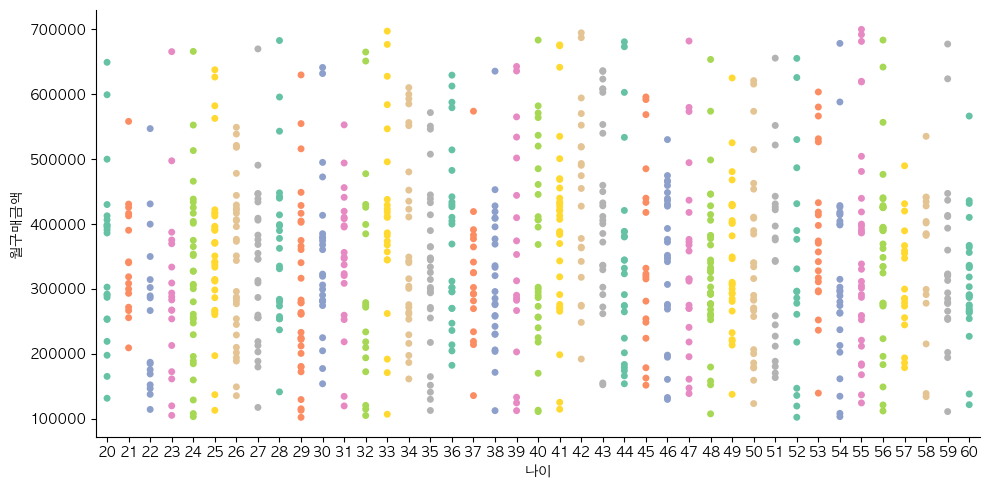

In [145]:
# 2. 나이와 월구매금액간의 관계를 확인하기 위한 그래프를 시각화하고 분석하시오.

sns.catplot(x = '나이', y = '월구매금액', data = st, kind = 'strip', palette = 'Set2', aspect = 2,  jitter = False)
plt.show()

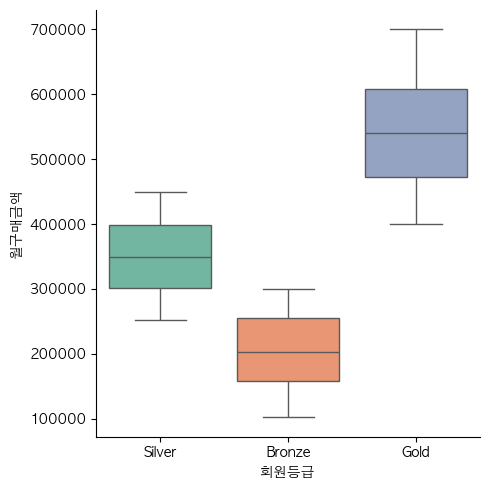

In [106]:
# 3. 회원등급별 월구매금액의 분포를 시각화하고 분석하시오.

sns.catplot(x = '회원등급', y = '월구매금액', data = st, kind = 'box', palette = 'Set2')
plt.show()

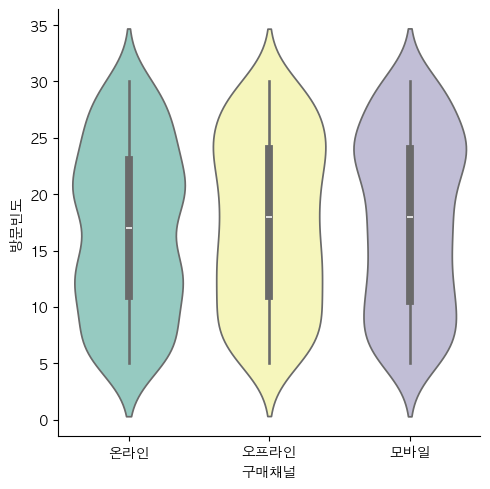

In [124]:
# 4. 구매채널(온라인/오프라인/모바일)에 따라 방문빈도가 다르게 나타나는지 시각화하고 분석하시오.

sns.catplot(x = '구매채널', y = '방문빈도', data = st, kind = 'violin', palette = 'Set3')
plt.show()

In [141]:
# 5. 고객들의 나이를 20대, 30대, 40대, 50대 이상으로 나누어 연령대별 평균 구매금액을 구하시오.
#    가장 구매력이 높은 연령대는?

st_age = []
for i in range(2, 6) :
    age = i*10
    st_age.append(round((st[st['나이'] >= age])['월구매금액'].mean()))
    if i == 5 :
        print(f'50대 이상 : {st_age[i-2]}')
    else :
        print(f'{age}대 : {st_age[i-2]}')

print(f'\n구매력이 높은 연령대 : {(st_age.index(max(st_age))+2)* 10}대')

20대 : 347431
30대 : 353143
40대 : 354318
50대 이상 : 341931

구매력이 높은 연령대 : 40대


In [166]:
def Correlation(corr) :
    if corr == 1.0 :
        result = '완벽한 양의 상관관계'
    elif corr >= 0.7 :
        result = '강한 양의 상관관계'
    elif corr >= 0.4 :
        result = '뚜렷한 양의 상관관계'
    elif corr >= 0.2 :
        result = '약한 양의 상관관계'
    elif corr > 0 :
        result = '거의 없는 상관관계'
    elif corr == 0 :
        result = '상관 없음'
    elif corr > -0.4 :
        result = '약한 음의 상관관계'
    elif corr > -0.7 :
        result = '뚜렷한 음의 상관관계'
    elif corr > -1.0 :
        result = '강한 음의 상관관계'
    else :
        result = '완벽한 음의 상관관계'
    return result

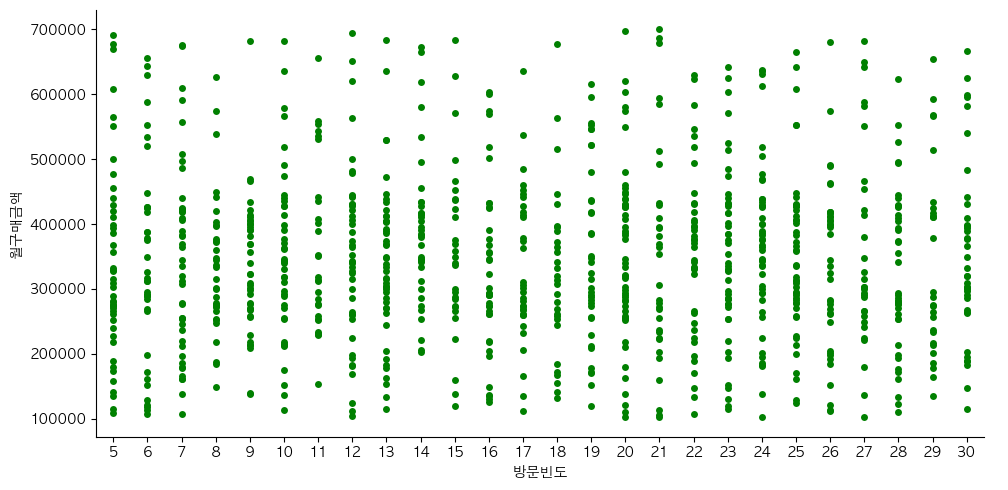

상관계수 : 0.01
고객들의 방문 빈도와 월구매금액은 거의 없는 상관관계를 가진다.


In [172]:
# 6. 고객들의 방문빈도와 구매금액 사이에 상관관계가 있는가? 상관계수와 함께 해석하시오.

from scipy.stats import pearsonr

corr, p = pearsonr(st['방문빈도'], st['월구매금액'])

sns.catplot(x = '방문빈도', y = '월구매금액', data = st, kind = 'strip', jitter = False, aspect = 2, color = 'green')
plt.show()

print(f'상관계수 : {corr:.2f}')
print('고객들의 방문 빈도와 월구매금액은 '+Correlation(corr)+'를 가진다.')

In [170]:
# 7. 고객의 회원등급이 높을수록 월구매금액이 높은지를 확인하시오. (Gold > Silver > Bronze로 가정)
#    상관계수와 함께 해석하시오.

grade_map = {'Bronze': 1, 'Silver': 3, 'Gold': 5}
st['등급숫자'] = st['회원등급'].map(grade_map)

corr, p = pearsonr(st['등급숫자'], st['월구매금액'])

print(f'상관계수 : {corr:.2f}')
print('고객의 회원등급과 월구매금액은 '+Correlation(corr)+'를 가진다.')

상관계수 : 0.88
고객의 회원등급과 월구매금액은 강한 양의 상관관계를 가진다.


In [178]:
# 8. 구매채널에 따른 평균 구매금액을 비교하고, 어떤 채널에서 구매금액이 가장 높은지 파악하시오.

channel_avg = st.groupby('구매채널')['월구매금액'].mean().round(2)
print(channel_avg)

# 최대 채널 출력
channel_max = channel_avg.idxmax()
print(f'\n가장 구매금액이 높은 채널: {channel_max}')

구매채널
모바일     348252.18
오프라인    349385.87
온라인     344456.86
Name: 월구매금액, dtype: float64

가장 구매금액이 높은 채널: 오프라인
